In [1]:
import os
import pandas as pd
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
import statsmodels.api as sm
import xarray as xr
from matplotlib.colors import TwoSlopeNorm
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [2]:
# Load normal simulation new
evapotranspiration_ds = xr.open_dataset("results/fast_model/evapotranspiration.nc")
runoff_ds = xr.open_dataset("results/fast_model/runoff.nc")
snow_ds = xr.open_dataset("results/fast_model/snow.nc")
soil_moisture_ds = xr.open_dataset("results/fast_model/soil_moisture.nc")

# Load normal simulation old
# evapotranspiration_ds_old = xr.open_dataset("results/model_output_evapotranspiration.nc")
# runoff_ds_old = xr.open_dataset("results/model_output_runoff.nc")
# snow_ds_old = xr.open_dataset("results/model_output_snow.nc")
# soil_moisture_ds_old = xr.open_dataset("results/model_output_soil_moisture.nc")

# Load with double precip var
evapotranspiration_ds_double = xr.open_dataset("results/dbl_precip_output/evapotranspiration.nc")
runoff_ds_double = xr.open_dataset("results/dbl_precip_output/runoff.nc")
snow_ds_double = xr.open_dataset("results/dbl_precip_output/snow.nc")
soil_moisture_ds_double = xr.open_dataset("results/dbl_precip_output/soil_moisture.nc")

# Load with half precip var
evapotranspiration_ds_half = xr.open_dataset("results/dbl_precip_output/evapotranspiration.nc")
runoff_ds_half = xr.open_dataset("results/dbl_precip_output/runoff.nc")
snow_ds_half = xr.open_dataset("results/dbl_precip_output/snow.nc")
soil_moisture_ds_half = xr.open_dataset("results/dbl_precip_output/soil_moisture.nc")

In [38]:
out_half = {}
out_dbl = {}
out_normal = {}

for out in ['evapotranspiration', 'runoff', 'snow', 'soil_moisture']:
    out_half[out] = xr.open_dataset(f"results/half_precip_output/{out}.nc")
    out_normal[out] = xr.open_dataset(f"results/fast_model/{out}.nc")
    out_dbl[out] = xr.open_dataset(f"results/dbl_precip_output/{out}.nc")

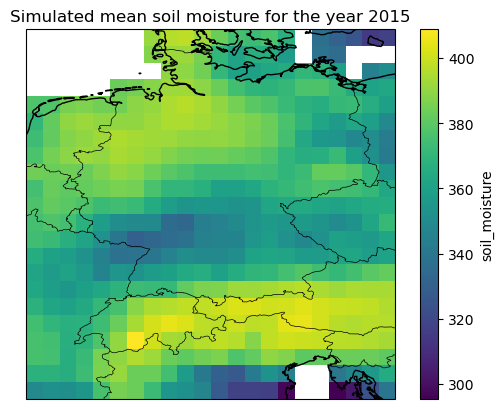

In [41]:
# Calculate Soil Moisture Mean Data for one year for all gridcells
year = 2015

sm_data_year = out_dbl['soil_moisture'].sel(time=str(year))
sm_mean_data = sm_data_year['soil_moisture'].mean(dim='time')

# Create a plot
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})

# Add country borders and coastlines
ax.add_feature(cfeature.BORDERS, linewidth=0.5)
ax.coastlines()

# Plot the data
sm_mean_data.plot.imshow(x='lon', y='lat', cmap='viridis', transform=ccrs.PlateCarree(), ax=ax)

plt.title(f'Simulated mean soil moisture for the year {year}')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

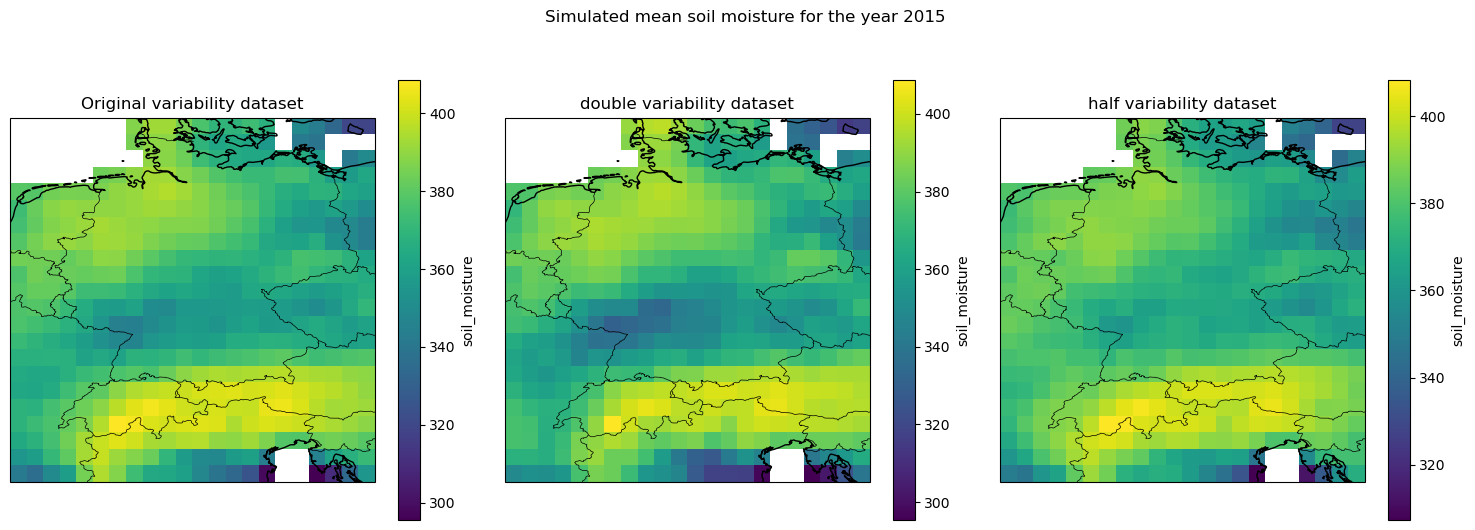

In [42]:
# Define the datasets
datasets = [out_normal['soil_moisture'], out_dbl['soil_moisture'], out_half['soil_moisture']]
dataset_names = ['Original variability', 'double variability', 'half variability']

# Calculate Soil Moisture Mean Data for one year for all grid cells
year = 2015

sm_data_year = [ds.sel(time=str(year))['soil_moisture'].mean(dim='time') for ds in datasets]

# Create subplots
fig, axs = plt.subplots(1, 3, subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(15, 5))

# Loop through datasets and plot
for ax, sm_data, name in zip(axs, sm_data_year, dataset_names):
    # Add country borders and coastlines
    ax.add_feature(cfeature.BORDERS, linewidth=0.5)
    ax.coastlines()

    # Plot the data
    sm_data.plot.imshow(x='lon', y='lat', cmap='viridis', transform=ccrs.PlateCarree(), ax=ax)
    
    ax.set_title(f'{name} dataset')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

plt.suptitle(f'Simulated mean soil moisture for the year {year}', y=1.05)
plt.tight_layout()
plt.show()

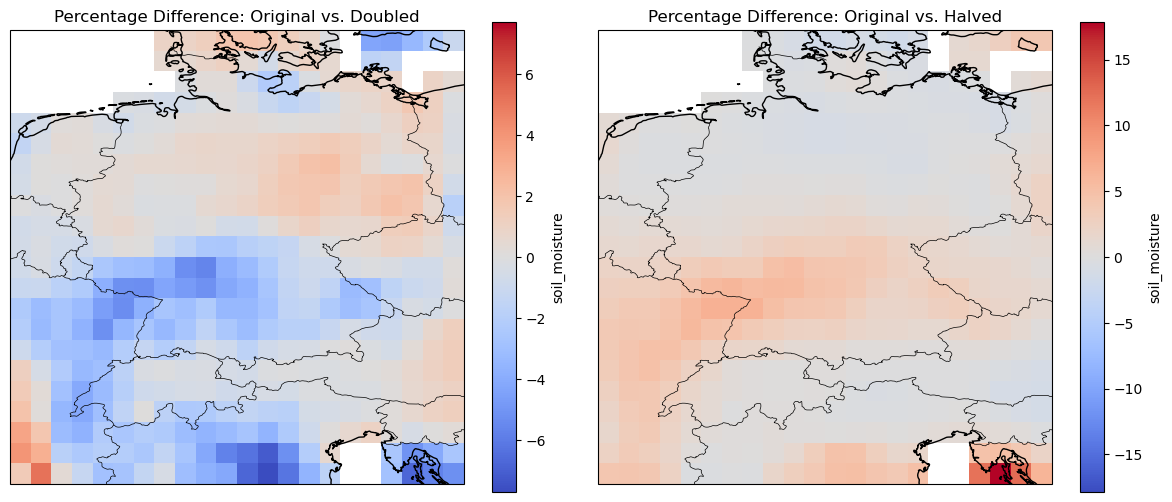

In [44]:
# Show the difference in percent

# Define the datasets
datasets = [out_normal['soil_moisture'], out_dbl['soil_moisture'], out_half['soil_moisture']]
dataset_names = ['Original variability', 'Double variability', 'Half variability']

# Calculate percentage difference between original and doubled/halved datasets
percentage_diff_double_ds = soil_moisture_ds.copy()
percentage_diff_half_ds = soil_moisture_ds.copy()
percentage_diff_double_ds['soil_moisture'] = ((datasets[1]['soil_moisture'] - datasets[0]['soil_moisture']) / datasets[0]['soil_moisture']) * 100
percentage_diff_half_ds['soil_moisture'] = ((datasets[2]['soil_moisture'] - datasets[0]['soil_moisture']) / datasets[0]['soil_moisture']) * 100

# Calculate Soil Moisture Mean Data for one year for all grid cells
year = 2015
percentage_diff_double = percentage_diff_double_ds.sel(time=str(year))['soil_moisture'].mean(dim='time')
percentage_diff_half = percentage_diff_half_ds.sel(time=str(year))['soil_moisture'].mean(dim='time')

# Create subplots
fig, axs = plt.subplots(1, 2, subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(12, 5))

# Plot percentage difference between original and doubled dataset
percentage_diff_double.plot.imshow(cmap='coolwarm', transform=ccrs.PlateCarree(), ax=axs[0])
axs[0].set_title('Percentage Difference: Original vs. Doubled')
axs[0].set_xlabel('Longitude')
axs[0].set_ylabel('Latitude')
axs[0].add_feature(cfeature.BORDERS, linewidth=0.5)
axs[0].coastlines()

# Plot percentage difference between original and halved dataset
percentage_diff_half.plot.imshow(cmap='coolwarm', transform=ccrs.PlateCarree(), ax=axs[1])
axs[1].set_title('Percentage Difference: Original vs. Halved')
axs[1].set_xlabel('Longitude')
axs[1].set_ylabel('Latitude')
axs[1].add_feature(cfeature.BORDERS, linewidth=0.5)
axs[1].coastlines()

plt.tight_layout()
plt.show()

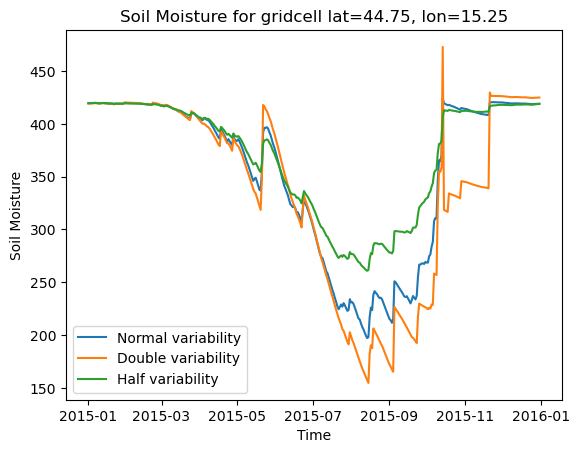

In [46]:
# Plot the time series of Soil Moisture for one year for one gridcell
year = 2015
lon = 15.25
lat = 44.75

sm_data_year_normal = out_normal['soil_moisture'].sel(time=str(year), lon=lon, lat=lat)
sm_data_year_dbl = out_dbl['soil_moisture'].sel(time=str(year), lon=lon, lat=lat)
sm_data_year_half = out_half['soil_moisture'].sel(time=str(year), lon=lon, lat=lat)


# Plot the soil moisture over time
plt.plot(sm_data_year_normal['time'], sm_data_year_normal['soil_moisture'], label='Normal variability')
plt.plot(sm_data_year_dbl['time'], sm_data_year_dbl['soil_moisture'], label='Double variability')
plt.plot(sm_data_year_half['time'], sm_data_year_half['soil_moisture'], label='Half variability')
plt.xlabel('Time')
plt.ylabel('Soil Moisture')
plt.title(f'Soil Moisture for gridcell lat={lat}, lon={lon}')
plt.legend()
plt.show()
